## Importing dependencies

In [2]:
#For Data collecting and Cleaning
import pandas as pd
import numpy as np

#For Preprocessing
# import re
# import nltk
# nltk.download("stopwords")
# from nltk.corpus import stopwords
# from nltk.stem.porter import *
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

#For Datavisualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Model Creation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from mlxtend.plotting import plot_confusion_matrix
from sklearn import datasets, tree, linear_model, svm
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [30]:
import warnings
warnings. filterwarnings('ignore')

## Collecting Data

In [3]:
df = pd.read_csv("emotions.csv", index_col=False)

In [4]:
len(df)

2132

In [5]:
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [6]:
df.columns

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)

In [7]:
df.shape

(2132, 2549)

In [8]:
df['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

## Data Visualization

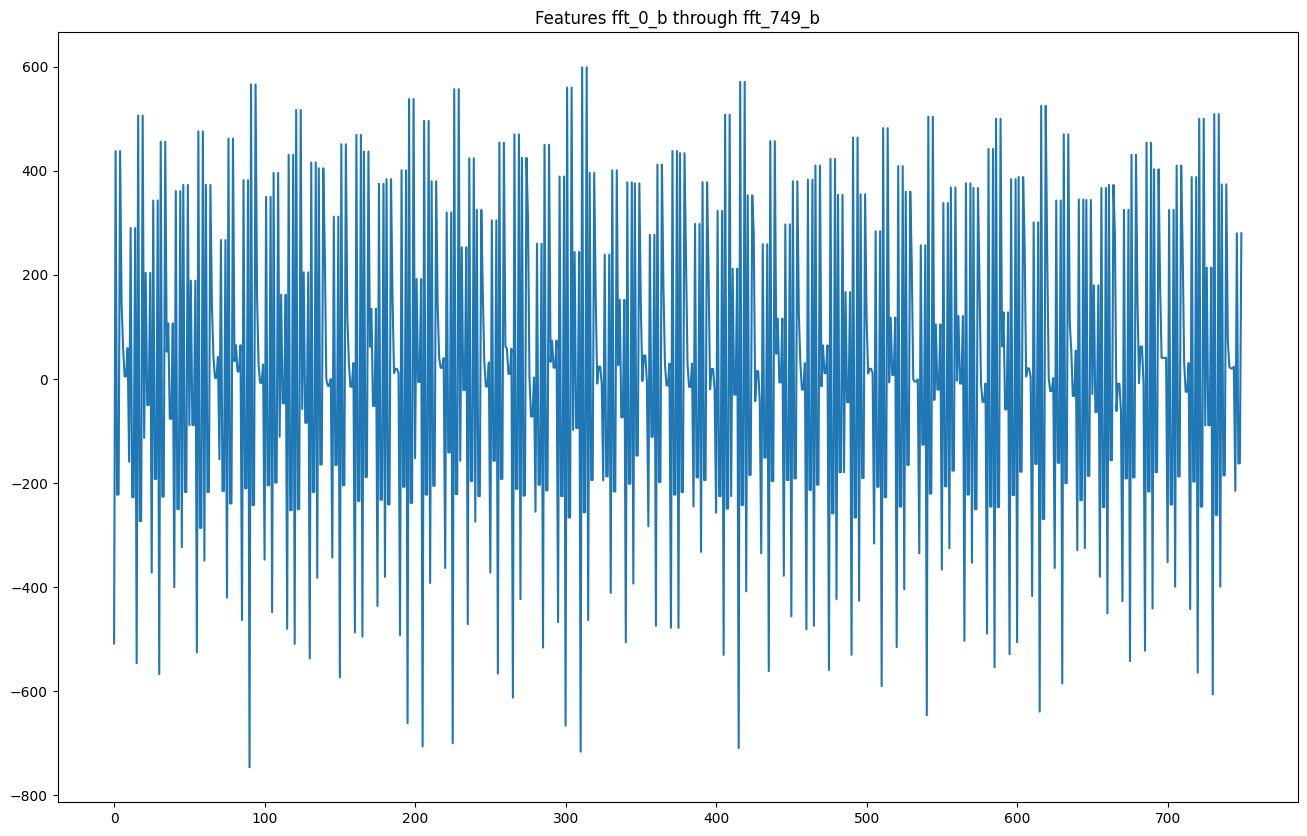

In [9]:
sample = df.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [10]:
#Seprarting Positive,Neagtive and Neutral dataframes for plotting
pos = df.loc[df["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = df.loc[df["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = df.loc[df["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']



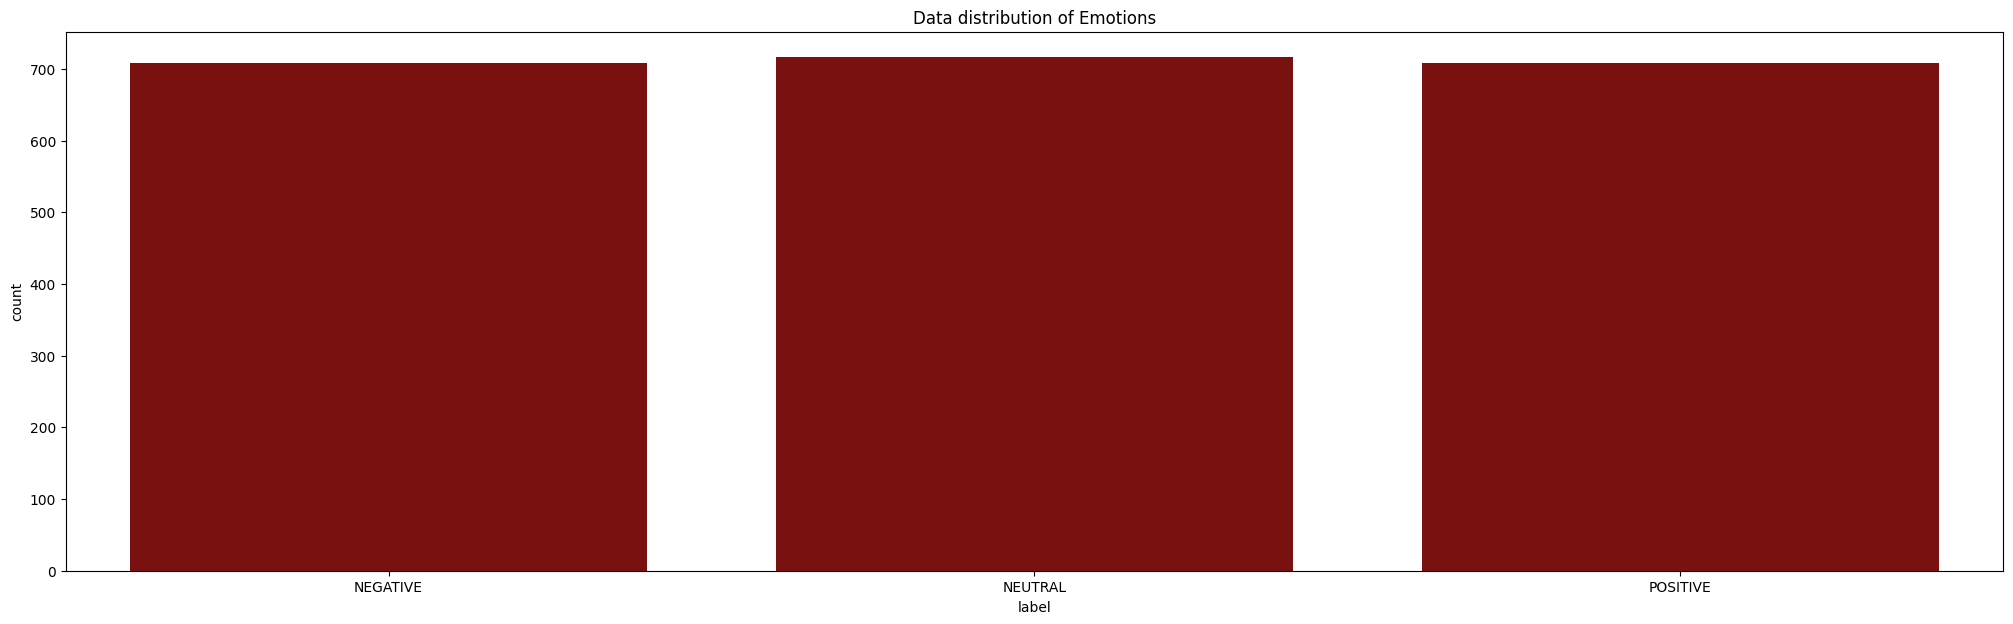

In [11]:
#plottintg Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=df, color='darkred')
plt.show()

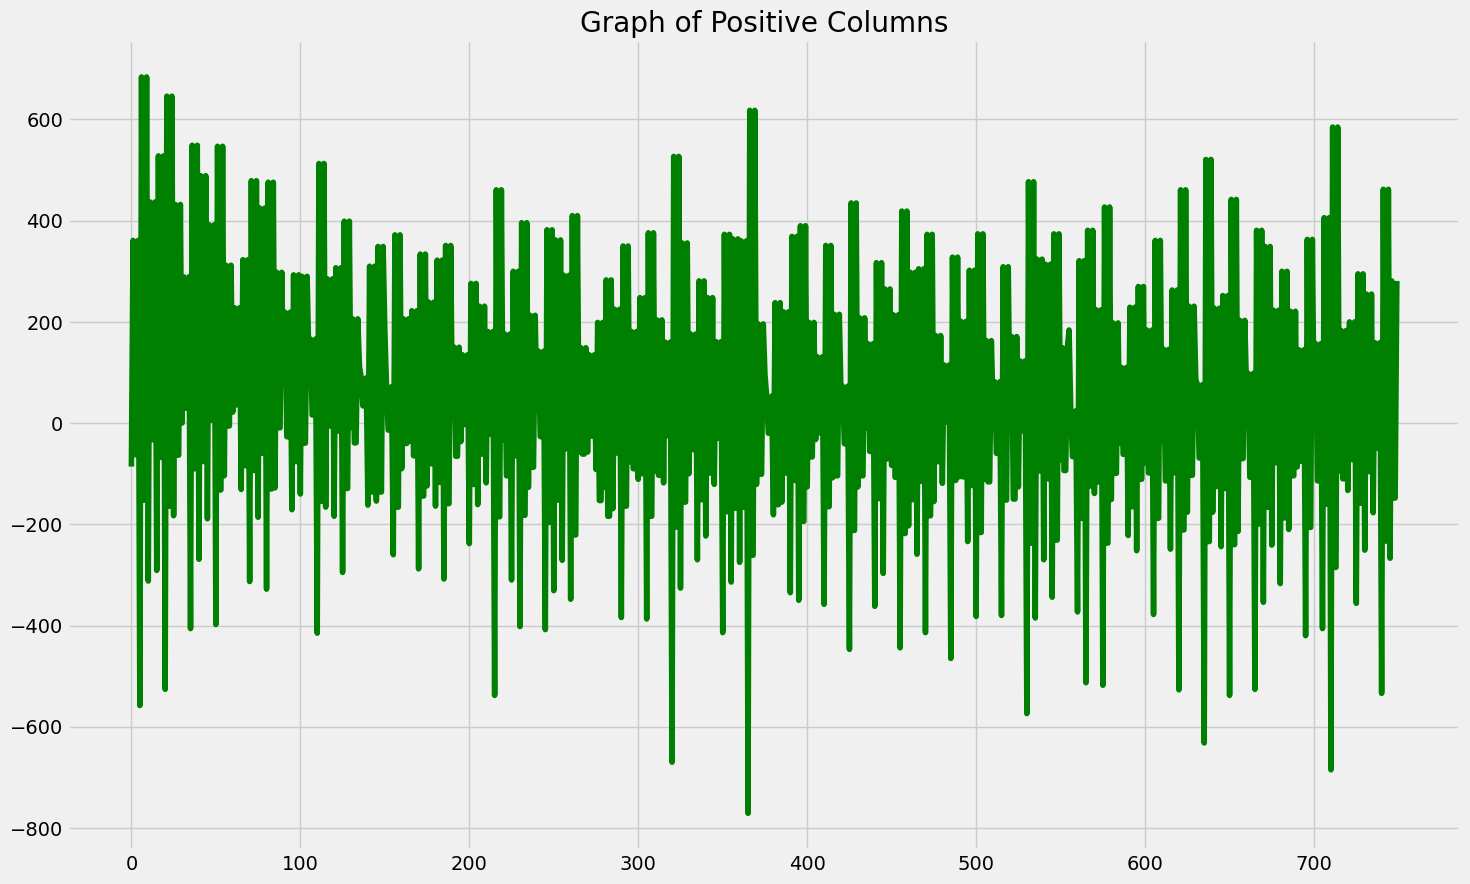

In [12]:
#Plotting Positive DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_pos, color='green')
plt.title("Graph of Positive Columns")
plt.show()

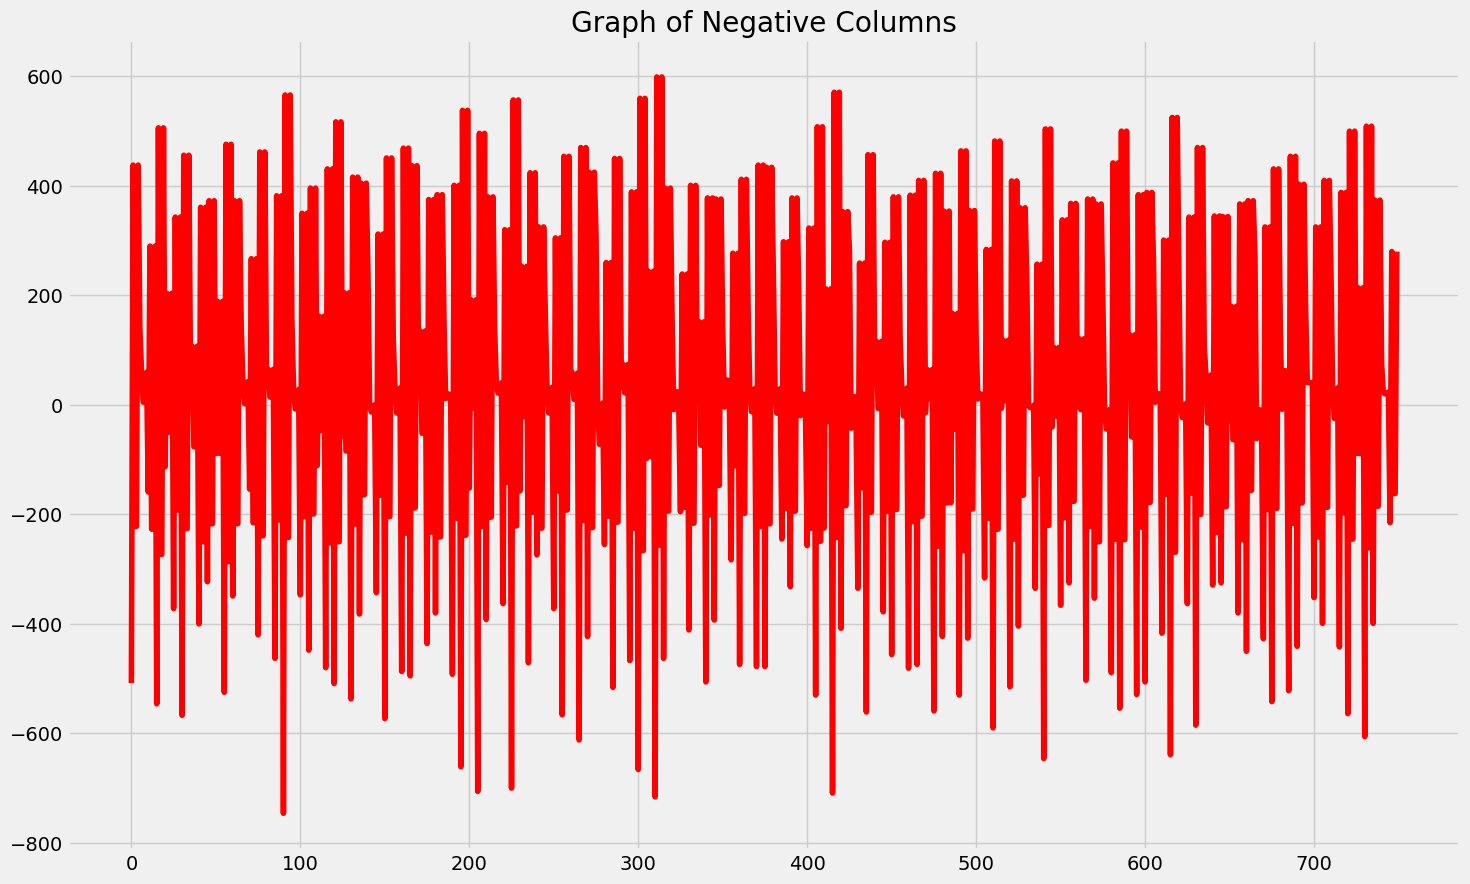

In [13]:
#Plotting Negative DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_neg, color='red')
plt.title("Graph of Negative Columns")
plt.show()

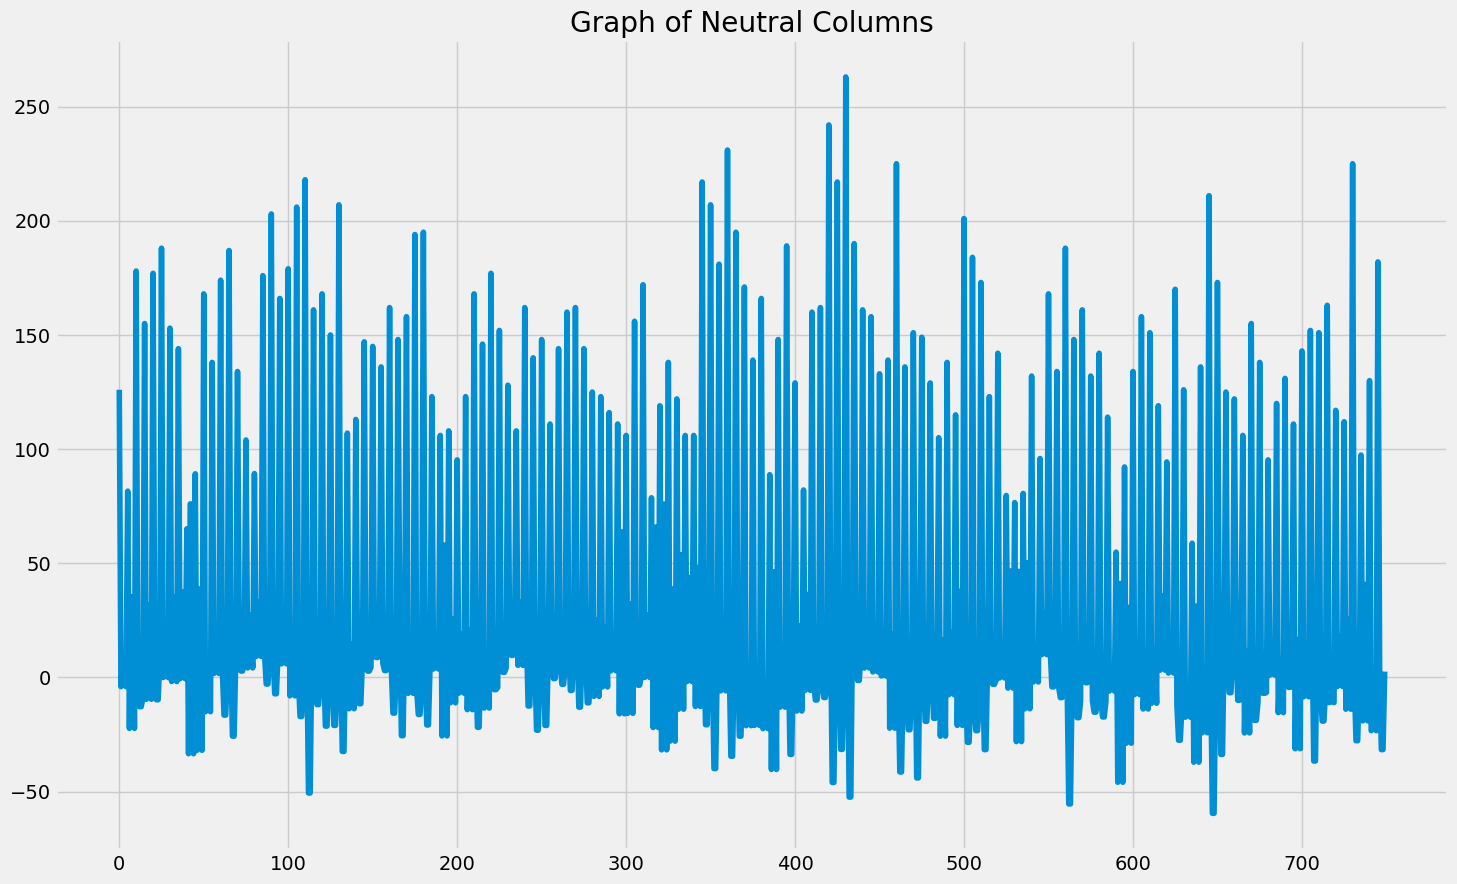

In [14]:
#Plotting Neutral DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()

## Data Preprocessing

In [15]:
def Transform_Data(df):

    #Transforming Labels to Numbers
    df['label'] = df['label'].map({"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2})
    x = df.drop('label', axis=1)
    y = df.loc[:, 'label'].values

    #Scaling Brain Signals
    scalar = StandardScaler()
    scalar.fit(x)
    X = scalar.transform(x)

    #one hot encoding labels
    Y = to_categorical(y)

    return X, Y

In [16]:
X, Y = Transform_Data(df)

## Data Spliting

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=8)
print("\nX_train & Y_train shape -->  ", X_train.shape, " ", Y_train.shape)
print("\nX_val & Y_val shape -->  ", X_val.shape, " ", Y_val.shape)
print("\nX_test & Y_test shape -->  ", X_test.shape, " ", Y_test.shape)


X_train & Y_train shape -->   (1278, 2548)   (1278, 3)

X_val & Y_val shape -->   (427, 2548)   (427, 3)

X_test & Y_test shape -->   (427, 2548)   (427, 3)


## Model Building

In [18]:
def create_model():
    #input layer of model for brain signals
    inputs = tf.keras.Input(shape=(X_train.shape[1],))
    #Hidden Layer for Brain signal using LSTM(GRU)
    expand_dims = tf.expand_dims(inputs, axis=2)

    gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
    #Flatten Gru layer into vector form (one Dimensional array)
    flatten = tf.keras.layers.Flatten()(gru)
    #output latyer of Model
    outputs = tf.keras.layers.Dense(3, activation='sigmoid')(flatten)


    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model


In [19]:
#cretaing model
lstmmodel = create_model()
#Compiling model
lstmmodel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda  (None, 2548, 1)           0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2155779 (8.22 MB)
Trainable params: 2155779 (8.22 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

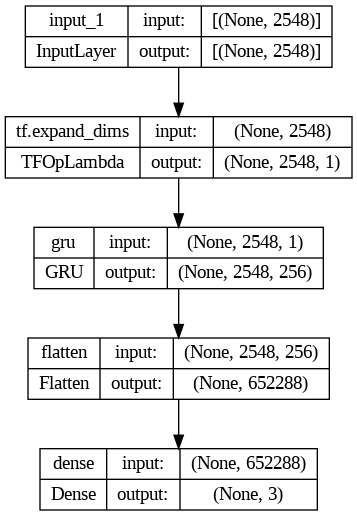

In [20]:
tf.keras.utils.plot_model(lstmmodel, show_shapes=True)

In [21]:
history = lstmmodel.fit(X_train, Y_train, epochs = 5, validation_data=(X_val,Y_val))
loss, acc = lstmmodel.evaluate(X_test, Y_test)

Epoch 1/5
40/40 [==============================] - 261s 6s/step - loss: 0.6521 - accuracy: 0.8552 - val_loss: 0.5944 - val_accuracy: 0.8290
Epoch 2/5
40/40 [==============================] - 269s 7s/step - loss: 0.2546 - accuracy: 0.9147 - val_loss: 0.4860 - val_accuracy: 0.8806
Epoch 3/5
40/40 [==============================] - 267s 7s/step - loss: 0.1294 - accuracy: 0.9577 - val_loss: 0.4414 - val_accuracy: 0.9063
Epoch 4/5
40/40 [==============================] - 268s 7s/step - loss: 0.1506 - accuracy: 0.9515 - val_loss: 0.3251 - val_accuracy: 0.9180
Epoch 5/5
14/14 [==============================] - 25s 2s/step - loss: 0.2912 - accuracy: 0.9227


In [22]:
pred  = lstmmodel.predict(X_test)

14/14 [==============================] - 27s 2s/step


In [23]:
#Classification Report of Lstm model
print('\n*\t\tClassification Report OF Brain Waves LSTM:\n', classification_report(np.argmax(Y_test,axis=1), np.argmax(lstmmodel.predict(X_test),axis=1) ))



14/14 [==============================] - 24s 2s/step

*		Classification Report OF Brain Waves LSTM:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       143
           1       0.90      0.87      0.88       149
           2       0.89      0.93      0.91       135

    accuracy                           0.92       427
   macro avg       0.92      0.92      0.92       427
weighted avg       0.92      0.92      0.92       427



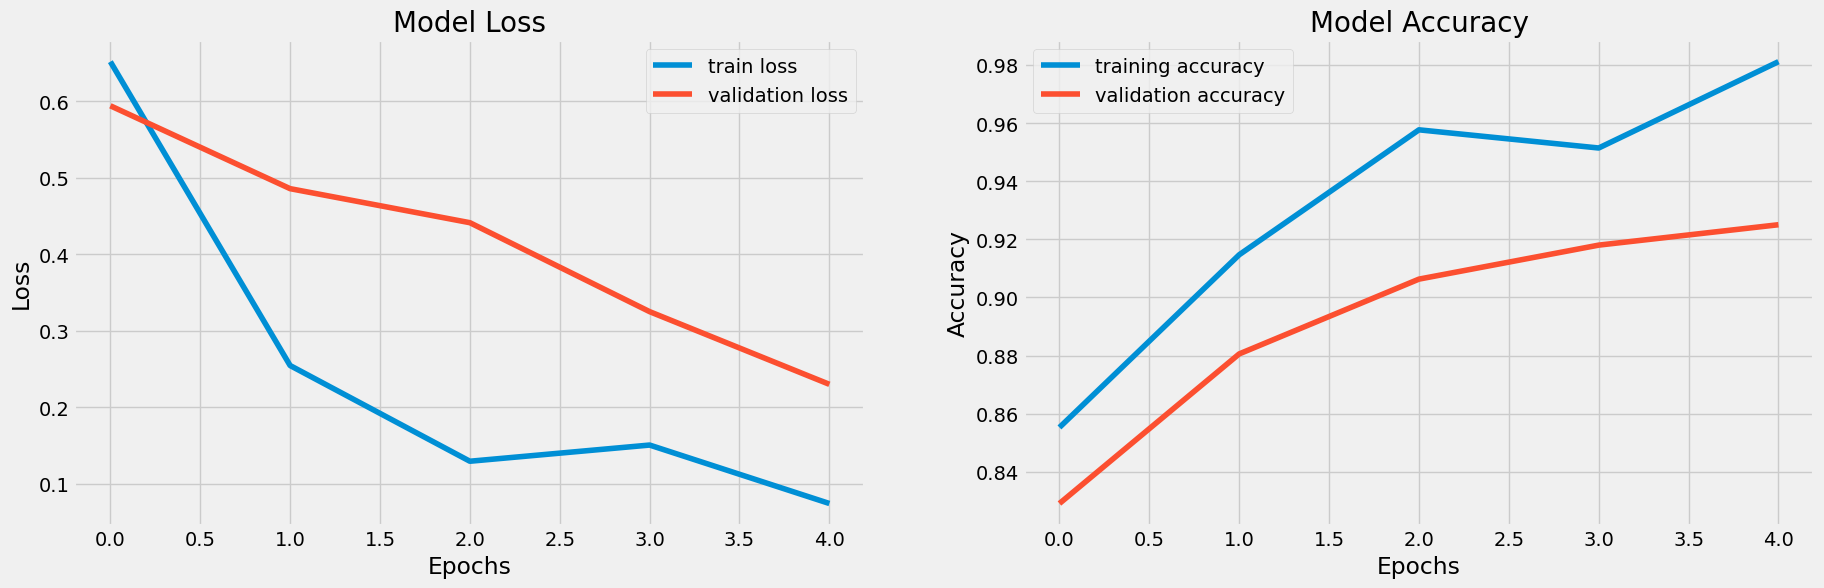

In [24]:
#Plotting Graph of Lstm model Training, Loss and Accuracy
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()


In [30]:
#Creation of Function of Confusion Matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df.label.unique()))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
#after getting prediction checking maximum score prediction to claim which emotion this brain signal belongs to
pred1 = np.argmax(pred,axis=1)

In [32]:
#inversing the one hot encoding
y_test1 =   np.argmax(Y_test,axis=1)

Confusion matrix, without normalization
[[139   4   0]
 [  4 129  16]
 [  0  10 125]]


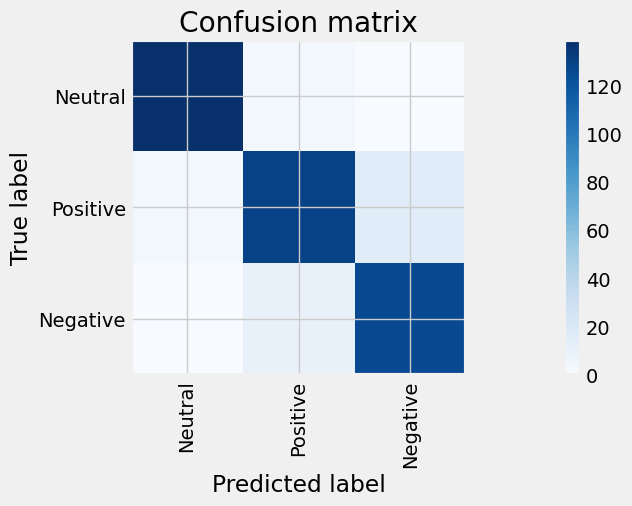

In [33]:
#Plotting Confusion matrix of Lstm Model
cm = confusion_matrix(y_test1, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.rcParams["figure.figsize"]=(20,5)
plt.figure()
plot_confusion_matrix(cm,["Neutral","Positive","Negative"])


In [34]:
### Support Vector Machine

Classifier_svm = svm.SVC(kernel='linear').fit(X_train, np.argmax(Y_train,axis=1))
pred_svm = Classifier_svm.predict(X_test)
print ('\n*\t\tClassification Report SVM:\n', classification_report(np.argmax(Y_test,axis=1), pred_svm))
confusion_matrix_graph = confusion_matrix(np.argmax(Y_test,axis=1), pred_svm)


*		Classification Report SVM:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       143
           1       0.96      0.89      0.92       149
           2       0.90      0.99      0.94       135

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



In [35]:
### Logistic Regression

Classifier_LR = linear_model.LogisticRegression(solver = 'liblinear', C = 75).fit(X_train, np.argmax(Y_train,axis=1))
pred_LR = Classifier_LR.predict(X_test)
print ('\n*\t\tClassification Report LR:\n', classification_report(np.argmax(Y_test,axis=1), pred_LR))
confusion_matrix_graph = confusion_matrix(np.argmax(Y_test,axis=1), pred_LR)


*		Classification Report LR:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       143
           1       0.96      0.87      0.91       149
           2       0.90      0.99      0.94       135

    accuracy                           0.94       427
   macro avg       0.94      0.94      0.94       427
weighted avg       0.94      0.94      0.94       427



In [36]:
### Decision Tree Regressor

Classifier_dt = tree.DecisionTreeClassifier().fit(X_train, np.argmax(Y_train,axis=1))
pred_dt = Classifier_dt.predict(X_test)
print ('\n*\t\tClassification Report Deccsion Tree:\n', classification_report(np.argmax(Y_test,axis=1), pred_dt))
confusion_matrix_graph = confusion_matrix(np.argmax(Y_test,axis=1), pred_dt)


*		Classification Report Deccsion Tree:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       143
           1       0.96      0.92      0.94       149
           2       0.94      0.98      0.96       135

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



In [37]:
### Random Forest

Classifier_forest = RandomForestClassifier(n_estimators = 50, random_state = 0).fit(X_train,np.argmax(Y_train,axis=1))
pred_fr = Classifier_dt.predict(X_test)


print ('\n*\t\tClassification Report Random Forest:\n', classification_report(np.argmax(Y_test,axis=1), pred_fr))
confusion_matrix_graph = confusion_matrix(np.argmax(Y_test,axis=1), pred_fr)


*		Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       143
           1       0.96      0.92      0.94       149
           2       0.94      0.98      0.96       135

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427

